<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2 
# *Mining Social Media with Twitter*

## The Twitter API and Tweepy Package

The Twitter API provides access to tweets and comments, and allows an application to post tweets to the user's timeline. 

Twitter requires developers to create and authenticate an app before they can use the API. As of recent policy changes, however, new developers must be approved before they can create an app. There is no indication of the waiting period for approval.

### 1. Apply for Developer Access

Go to https://blog.twitter.com/developer/en_us/topics/tools/2018/new-developer-requirements-to-protect-our-platform.html
and read the advice.

Apply at https://developer.twitter.com/en/apply-for-access.html. Where asked state that you will use the app as a student to explore the tweepy Python library and use it to fetch recent tweets and to create/delete a tweet.

### 2. Create Your Twitter App
Go to https://developer.twitter.com/en/portal/projects-and-apps and click on the "+ Create App" button. Give your app a name and then you will be able to generate Consumer Keys (API key & secret) and Authentication Tokens (Access token & secret). Copy-paste these authentication details for use in this lab.

### 3. Load Python Libraries

In [1]:
!pip install tweepy

     |████████████████████████████████| 62 kB 1.5 MB/s eta 0:00:011


In [2]:
import tweepy
import json
import pprint

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

In [3]:
my_consumer_key = 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
my_consumer_secret = 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
my_access_token = '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string) goes in here
access_token_secret = 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here

In [4]:
import json

auth_twitter_json = {
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
    , 'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
    , 'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string goes in here
    , 'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here
}

with open('auth_twitter.json', 'w') as outfile:  
    json.dump(auth_twitter_json, outfile)

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_twitter.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`   "consumer_key": "your consumer key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "consumer_secret": "your consumer secret key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"access_token": "your access token (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"access_token_secret": "your access token secret (string) goes in here"` <br>
`}`

(Nb. Parsers are very fussy. Make sure each key:value pair has a comma after it except the last one!)  

Use the following code to load the credentials:  

In [5]:
pwd()  # make sure your working directory is where the file is

'/Users/janicegarcia/Downloads/Module 2/Answers'

In [6]:
path_auth = 'auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
pp.pprint(auth)

{   'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr',
    'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW',
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d',
    'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'}


In [7]:
my_consumer_key = auth['consumer_key']
my_consumer_secret = auth['consumer_secret']
my_access_token = auth['access_token']
my_access_token_secret = auth['access_token_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody accesses this notebook while it's running on your computer 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Twitter using the Tweepy library:

In [8]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [12]:
api.followers()[0]._json

AttributeError: 'API' object has no attribute 'followers'

Consult the Tweept and Twitter API documentation. Print a few of the response members below:

In [11]:
# Retrieve a Twitter user object
obama = api.get_user('barackobama')

TypeError: get_user() takes 1 positional argument but 2 were given

In [33]:
obama.status

Status(_api=<tweepy.api.API object at 0x000002B06D723A88>, _json={'created_at': 'Fri May 29 16:06:54 +0000 2020', 'id': 1266400635429310466, 'id_str': '1266400635429310466', 'text': 'My statement on the death of George Floyd: https://t.co/Hg1k9JHT6R', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1266400446517829633, 'id_str': '1266400446517829633', 'indices': [43, 66], 'media_url': 'http://pbs.twimg.com/media/EZMofxYXYAELmWd.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EZMofxYXYAELmWd.jpg', 'url': 'https://t.co/Hg1k9JHT6R', 'display_url': 'pic.twitter.com/Hg1k9JHT6R', 'expanded_url': 'https://twitter.com/BarackObama/status/1266400635429310466/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 1098, 'resize': 'fit'}, 'small': {'w': 680, 'h': 622, 'resize': 'fit'}, 'large': {'w': 1226, 'h': 1122, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [

This will fetch recent tweets from accounts you follow:

In [14]:
# Recent tweets from accounts you follow:
tweets = api.home_timeline()
for tweet in tweets:
    print(tweet.text)

TRICK OR TREAT: This market is selling a ‘slightly sweet &amp; not scary at all’ candy corn sausage just in time for Ha… https://t.co/E8HPoUKSK0
That was an exhilarating watch! Azarenka had too much composure for Ostapenko, who was unable to contain her desire… https://t.co/M9zkKgrbcv
Kevin makes a powerful point. Net zero by 2050 is good. But it’s the bare minimum. The critical issue is to increas… https://t.co/6tQDq4Qdnt
🗣 "Some people say coaches should be stoney-faced and just sit there. It’s not my character."

@OfficialSLC coach M… https://t.co/ZtAVmOISIm
Kenosha police 'deputized' militia ahead of deadly shooting, lawsuit claims https://t.co/I156hBJRtf https://t.co/E7etDH7nwd
https://t.co/mdbeGoi2Xb
This daily infographic provides the total number of vaccine doses administered in Australia 🇦🇺 as of 15 October 202… https://t.co/i0xhgRb6AL
'MS Dhoni के बाद, उनकी कप्तानी आएगी #CSK को सबसे ज़्यादा याद' 🗣️

@virendersehwag और Ashish Nehra ने बांधे captain… https://t.co/NJZqPJvw1o
Her

The request to see your own recent tweets is similar, but uses the `user_timeline` endpoint. Try this below:

In [15]:
#ANSWER:
# Your recent tweets:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.text)

When was the last time Shakib played an innings in T20 which impacted the result?
♥️ https://t.co/YW7LrxihsC
@ovshake42 1000 wickets?
Healy smashing Flintoff.
Healy is back. 💥
Shefali. 🎯 https://t.co/9gngwe2g1C
Can’t wait T20 World Cup to start. https://t.co/0FREZuK55K
@TheRealPCB @iRashidLatif68 Is it the same Latif who used to claim catch without catching one? #Cheater
Time flies! #MyTwitterAnniversary https://t.co/sWSTOjZppV
@cricketingview 😂
RT @kaustats: Overseas player scores for KKR today - Morgan 0, Shakib 0, Narine 0, Ferguson 0*
https://t.co/CjTSzmy582 https://t.co/sPanpzY7wV
@cricketingview LMAO

More like Australian Graeme Hick.
I would be very pleased if he can score thirties regularly in International. https://t.co/KON4MMoY6T
https://t.co/sidLLTVSMu https://t.co/uI57b4VtJA
Australia’s 'best ever' who did not able to get 20 wickets of India 'B'. Twice. In their own backyard. https://t.co/TlNEEXmbHs
https://t.co/9SiWTQNUPy https://t.co/uARwOCrCTp
Mark Waugh https://t.co/NRp

Now, instead of printing the text of each tweet, print the `created_at` and `id_str` methods:

In [16]:
#ANSWER:
# tweets header info
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.created_at)
#     print(tweet.id_str)
    print(tweet.text)

2021-10-15 19:53:16+00:00
When was the last time Shakib played an innings in T20 which impacted the result?
2021-10-14 22:23:59+00:00
♥️ https://t.co/YW7LrxihsC
2021-10-14 22:20:29+00:00
@ovshake42 1000 wickets?
2021-10-14 11:10:11+00:00
Healy smashing Flintoff.
2021-10-14 11:08:59+00:00
Healy is back. 💥
2021-10-14 11:07:31+00:00
Shefali. 🎯 https://t.co/9gngwe2g1C
2021-10-14 10:38:53+00:00
Can’t wait T20 World Cup to start. https://t.co/0FREZuK55K
2021-10-14 04:37:07+00:00
@TheRealPCB @iRashidLatif68 Is it the same Latif who used to claim catch without catching one? #Cheater
2021-10-14 03:16:25+00:00
Time flies! #MyTwitterAnniversary https://t.co/sWSTOjZppV
2021-10-13 21:03:48+00:00
@cricketingview 😂
2021-10-13 19:25:12+00:00
RT @kaustats: Overseas player scores for KKR today - Morgan 0, Shakib 0, Narine 0, Ferguson 0*
2021-10-13 11:02:59+00:00
https://t.co/CjTSzmy582 https://t.co/sPanpzY7wV
2021-10-13 08:15:00+00:00
@cricketingview LMAO

More like Australian Graeme Hick.
2021-10-13 08

In [17]:
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet._json)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.DataFrame(tweet_list)

In [20]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

In [21]:
df.head()

,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities,retweeted_status
created_at,,,,,,,,,,,,,,,,,,,,,
2021-10-15 19:53:16+00:00,1449101087525408769,1449101087525408769,When was the last time Shakib played an inning...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-14 22:23:59+00:00,1448776626192322560,1448776626192322560,♥️ https://t.co/YW7LrxihsC,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,NaN,None,...,0,False,False,und,1.448605e+18,1448604999626289155,{'created_at': 'Thu Oct 14 11:02:00 +0000 2021...,False,NaN,NaN
2021-10-14 22:20:29+00:00,1448775748278382595,1448775748278382595,@ovshake42 1000 wickets?,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.448605e+18,1448605003547963394,541499063.0,541499063,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-14 11:10:11+00:00,1448607060279508996,1448607060279508996,Healy smashing Flintoff.,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-14 11:08:59+00:00,1448606756901322758,1448606756901322758,Healy is back. 💥,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.dtypes

id                             int64
id_str                        object
text                          object
truncated                       bool
entities                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                  object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
lang                          object
quoted_status_id             float64
quoted_status_id_str          object
quoted_status                 object
possibly_sensitive            object
extended_entities             object
r

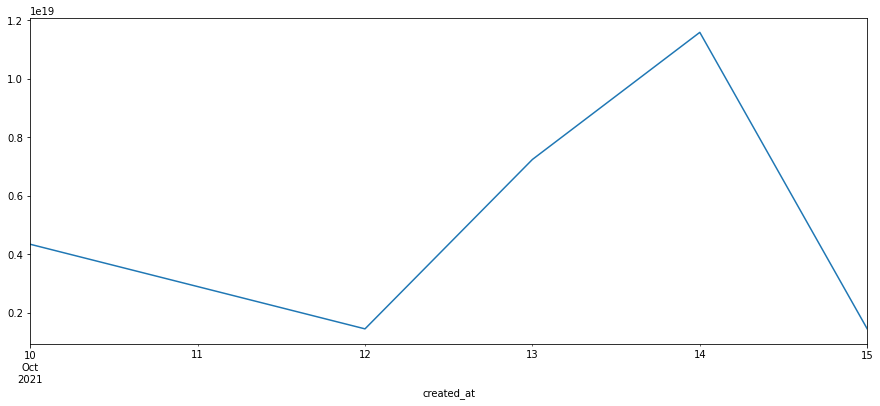

In [23]:
y = df['id'].resample('D').sum()
y.plot(figsize=(15, 6));

In [24]:
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
def check_tweets(twitter_handle):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    
    y = df['id'].resample('D').count()
    y.plot(figsize=(15, 6))
    plt.show();

In [25]:
def check_tweets_wordcloud(twitter_handle, withall=True):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    
    if withall: 
        text = df.text.values
    else:
        text = ','.join([x for x in df.text.values])
        blob = TextBlob(text)
        text = blob.noun_phrases
    
    wordcloud = WordCloud(
        width = 3000
        , height = 2000
        , background_color = 'black'
        , stopwords = STOPWORDS
    ).generate(str(text))
    
    fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show();

In [26]:
check_tweets('realDonaldTrump')

NameError: name 'check_tweets' is not defined

In [27]:
check_tweets_wordcloud('realDonaldTrump', withall=False)

Unexpected parameter: id


Unauthorized: 401 Unauthorized

You can create a tweet as follows:

In [28]:
# create a tweet:
tweet = api.update_status('Test: Made with Tweepy')

(Nb. Don't abuse this feature! If you try to generate a zillion tweets in a loop, Twitter will ban youur account.)

Tweets can be deleted by reference to their `id_str` attribute:

In [29]:
# delete a tweet:
status = api.destroy_status(tweet.id_str)

You can follow a Tweeter:

In [30]:
# follow:
api.create_friendship('@YouTube')

TypeError: create_friendship() takes 1 positional argument but 2 were given

or unfollow:

In [31]:
# unfollow:
api.destroy_friendship('@YouTube')

TypeError: destroy_friendship() takes 1 positional argument but 2 were given

>
>
>
>
>

>
>




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



